1. Visualise the data you downloaded by placing a marker on a 2D plot for each
pair of feature values i.e. for each row in the data. On the plot the x-axis should
be the value of the first feature, the y-axis the value of the second feature and
the marker should be, for example, a + marker when the target value is +1 and
a o when the target is −1. Your plot should look similar in style to this (with
different data points of course!):

Import Library's

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# According to artical 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


Read File
Here i am assuming data is already clean.

In [242]:
df = pd.read_csv("./data/week2.csv")
X1 = df.iloc[:, 0]
X2 = df.iloc[:, 1]
Y = df.iloc[:, 2]
X = np.column_stack((X1,X2))
y = np.array(Y)
df.dropna(inplace = True)

Plot Graph according to features

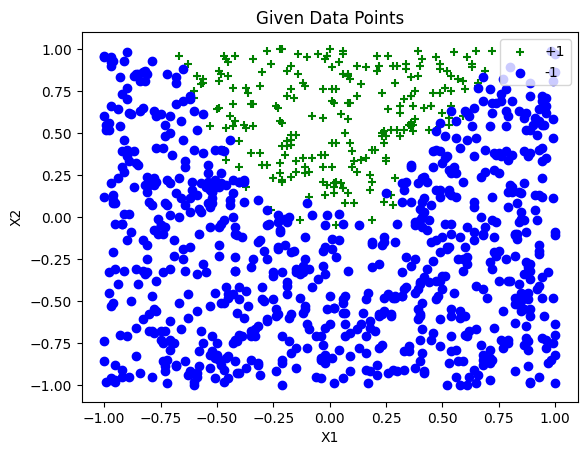

In [243]:
postive = [i for i in range(len(y)) if y[i] == 1]
plt.scatter([X[i][0] for i in postive], [X[i][1] for i in postive], marker='+', color='green', label='+1')

negative = [i for i in range(len(y)) if y[i] == -1]
plt.scatter([X[i][0] for i in negative], [X[i][1] for i in negative], marker='o', color='blue', label='-1')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Given Data Points')
plt.show()

Now we will train a model 

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
coef = log_reg.coef_[0]
intercept = log_reg.intercept_[0] 
print(f"Intercept (Bias): {intercept}")
print(f"Coefficient for Feature X1: {coef[0]}")
print(f"Coefficient for Feature X2: {coef[1]}")

accuracy = log_reg.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

if coef[0] > coef[1]:
    print("Feature X1 has more influence on the prediction than X2.")
else:
    print("Feature X2 has more influence on the prediction than X1.")

if coef[0] > 0:
    print("Increasing Feature X1 increases the likelihood of predicting class +1.")
else:
    print("Increasing Feature X1 increases the likelihood of predicting class -1.")

if coef[1] > 0:
    print("Increasing Feature X2 increases the likelihood of predicting class +1.")
else:
    print("Increasing Feature X2 increases the likelihood of predicting class -1.")

Intercept (Bias): -2.2498714154196953
Coefficient for Feature X1: 0.17783619471015386
Coefficient for Feature X2: 3.6525828374931857
Model Accuracy: 0.7966666666666666
Feature X2 has more influence on the prediction than X1.
Increasing Feature X1 increases the likelihood of predicting class +1.
Increasing Feature X2 increases the likelihood of predicting class +1.


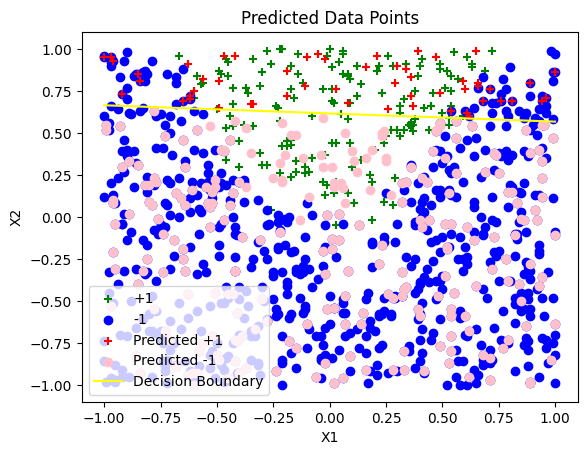

In [245]:
y_pred = log_reg.predict(X_test)

postive = [i for i in range(len(y)) if y[i] == 1]
plt.scatter([X[i][0] for i in postive], [X[i][1] for i in postive], marker='+', color='green', label='+1')

negative = [i for i in range(len(y)) if y[i] == -1]
plt.scatter([X[i][0] for i in negative], [X[i][1] for i in negative], marker='o', color='blue', label='-1')

positive_pred = [i for i in range(len(y_pred)) if y_pred[i] == 1]
plt.scatter([X_test[i][0] for i in positive_pred], [X_test[i][1] for i in positive_pred], marker='+', color='red', label='Predicted +1')

negative_pred = [i for i in range(len(y_pred)) if y_pred[i] == -1]
plt.scatter([X_test[i][0] for i in negative_pred], [X_test[i][1] for i in negative_pred], marker='o', color='pink', label='Predicted -1')


# why we are doing this 
x1_vals = np.linspace(min(X1), max(X1), 100)

x2_vals =  - (coef[0] / coef[1]) * x1_vals - (intercept / coef[1])

plt.plot(x1_vals, x2_vals, color='yellow', label='Decision Boundary')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Predicted Data Points')
plt.show()